# Simple Non-Parametric Tests

## intro

**parametric test**
* examples: t-test, ANOVA
* used to compare central tendencies (means) of two samples when:
    * you know sample distribution
    and/or
    * *n* is large enough to assume a normal distribution via Central Limit Theorem
* powerful when assumptions hold true

**non-parametric test**
* doesn't assume specific distribution for the data
* often based on rank or median (rather than mean)
* more flexible, but less powerful when parametric assumptions are true (safer when data violate normality)
* used when:
    * data is skewed, ordinal, or small n
* examples: Mann-Whitney U test, Wilcoxon signed-rank test, Krusal-Wallis test, Spearman correlation


In [1]:
import numpy as np
import scipy.stats as st
from statsmodels.stats.descriptivestats import sign_test

## Sign Test
**for one sample, skewed distribution**

* used for a single sample with paired measurement (ex: before versus after treatment)
* determines direction of change (but not magnitude)
* counts number of times the values are positive vs. negative
* Ho: increase/decrease are equally likely (p = 0.5)
    * thus, uses binomial distribution to check number of postives vs. negatives is different than expected by chance

In [7]:
# SIGN TEST

## Make some paired data
a = [3,10,4,20,4,7,50,3,5,5,7]              # before treatment
b = [5,9,10,15,6,5,43,6,2,1,0]              # after treatment
diff = [bi-ai for ai, bi in zip(a,b)]       # differences between before and after
_, p = sign_test(diff)                      # get p-value using sign test of differences
print(f'p={p:.2f}')                         # print p-value



p=0.55


## Wilcoxon signed-rank test
**for one sample or paired samples, symmetric distributions**

* non-parametric alternative to the t-test, checking whether median difference is zero 
* used when data are not normal, but roughly symmetric
* compares medians instead of means
    * for one sample, answers: *is median of my sample equal to some value?*
    * for paired samples, answers: *is median difference between paired samples = 0?*
* considers both direction and size of differences



In [ ]:
samples = np.random.randint(0, high=51, size=200)       # generate 200 random integers between 0 and 50
null_hypothesis_median = 24                             # median under null hypothesis

# Unlike in Matlab, the scipy implementation does not handle the case of comparing
#  to a median other than zero, so we make this a (fake) paired two-sample test
#  by subtracting the median from each value
_, p = st.wilcoxon(samples-null_hypothesis_median)      # wilcoxon signed-rank test comparing samples to null hypothesis median
print(f'p = {p:.2f}')                                   # print p-value

p = 0.69


## Mann-Whitney
**unpaired, two sample**

* for two independent groups when data are not normally distributed (in place of two sample t-test)
* how it works:
    * combines two groups values, ranking from smallest to largest
    * compares the rank sums of the groups
    * if one group has a consistantly higher/lower value, the rank sums will differ
* used for continous or ordinal data
* checks whether one group generally has lower or higher values than the other


In [10]:
X = np.random.randint(0, high=51, size=200)
Y = 2 + np.random.randint(0, high=51, size=200)
_, p = st.mannwhitneyu(X,Y)
print(f'p = {p:.2f}')

p = 0.09


## Exercises

### scenario 1
You are a behavioral geologist measuring the reaction time of rocks in response to a tone. Specifically, you want to compare the median reaction time of geodes, to that of limestone. You recruit 20 rocks per group, and run your reaction-time experiment. What test would you use to compare median reaction times between geodes and limestone, and why?

**ANSWER: I would use the Mann-Whitney test b/c unpaired samples in two groups, comparing median values**

### scenario 2
You are a brilliant scientist working at a biotech firm developing a vaccine that reverses aging. Wow! To test the efficacy of the vaccine, you recruit 50 people, give them a course of your vaccine, and measure their age with a (very) special scale before and after treatment. You want to start by refuting the simple that that the participants' measured ages are not changed by the treatment. What test do you use and why?

**ANSWER: I would use the sign test, becuase paired samples looking for a change up or down, but not concerned with a magnitude of change -- the question is simply is there a change after versus before**

### scenario 3
You are a neuroeconomist and believe you have developed a wearable device that can change consumer preferences about a given product. To test your device, you present product X to a group of 40 individuals, and ask them to fill out a survery assessing how much they like the product (larger score means they like it more). Then, you have the individuals wear the device, present product X, and assess how much they like of the product. You want to know if the device reliably increases, decreases, or does not affect their liking of product X. What test would you use and why? What result would indicate that their liking has increased?

**ANSWER: I would use the sign test, becuase that is one sample with paired measurement, and would determine increase/decrease/no change in liking. A positive result would indicate increased liking**

# Pearson's chi-square test

* non-parametric test, assuming only that you have enough data for chi-square distrb. to be relevant (but nothing else about the distribution of the data)
* both forms of this test use chi-square test
    * sum of squared differenced between observed - expected frequencies (in raw numbers) over the expected frequencies

## Chi-square goodness-of-fit test
* does a categorical variable follow a particular hypothesized distribution?
* measure of how far a sample distribution deviates from a theoretical distribution
    * is uneveness in a sample chance or real effect
* small chi-square = data matches expectations (fail to reject Ho)
* large chi-square = data too different from expectations (reject Ho)



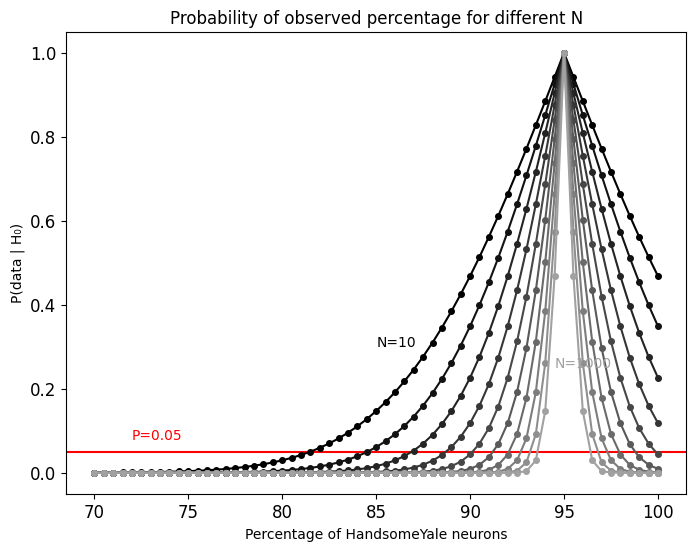

In [11]:
# Compute p values
N = np.logspace(1, 3, 10)  # 10^1 to 10^3
proportion = np.arange(0.7, 1.0 + 0.005, 0.005)  # 0.7 to 1.0 step 0.005

ps = np.full((len(N), len(proportion)), np.nan)

# Degrees of freedom
df = 1

# Loop over N and proportion
for ii in range(len(N)):
    for jj in range(len(proportion)):
        handsomeYale = proportion[jj] * N[ii]
        nonHandsomeJosh = N[ii] - handsomeYale
        theoreticallyHandsome = 0.95 * N[ii]
        theoreticallyNonHandsome = N[ii] - theoreticallyHandsome

        chiSquare = ((handsomeYale - theoreticallyHandsome) ** 2) / theoreticallyHandsome + \
                    ((nonHandsomeJosh - theoreticallyNonHandsome) ** 2) / theoreticallyNonHandsome
        ps[ii, jj] = 1 - st.chi2.cdf(chiSquare, df)

# --- Plotting ---
plt.figure(figsize=(8, 6))
plt.axhline(0.05, color='red')  # P=0.05 reference line

for ii in range(len(N)):
    gray_val = (ii) / len(N) * 0.7
    plt.plot(proportion * 100, ps[ii, :], '.-', markersize=8, color=(gray_val, gray_val, gray_val))

plt.text(85, 0.3, f'N={N[0]:.0f}')
plt.text(94.5, 0.25, f'N={N[-1]:.0f}', color=(len(N)-1)/len(N) * 0.7 * np.ones(3))
plt.text(72, 0.08, 'P=0.05', color='red')

plt.xlabel('Percentage of HandsomeYale neurons')
plt.ylabel('P(data | H₀)')
plt.title('Probability of observed percentage for different N')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Chi-squared test of independence
* tests group differences for categorical values (more general case of goodness-of-fit test)
* data type = contingency table (rows x columns)
* works by:
    * calculating what to expect if variables were truly independent
    * use chi-square formula to compare expected to observed counts
* hypotheses
    * null: variables are independent (small chi-square)
    * alt: variables are dependent/theres a relationship (large chi-square)

In [12]:
puppies = [32,43,16,9]
kittens = [55,65,65,26]

# Create contingency table
table = np.array([puppies, kittens])

# Perform Chi-squared test
chi2_stat, p_value, dof, expected = st.chi2_contingency(table)

print(f"Chi-squared statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.4f}")
print("Expected counts:")
print(expected)

Chi-squared statistic: 10.1347
Degrees of freedom: 3
P-value: 0.0175
Expected counts:
[[27.97427653 34.7266881  26.04501608 11.25401929]
 [59.02572347 73.2733119  54.95498392 23.74598071]]
